In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from utils.model_utils import *

## 1. Redimensionando e Selecionando os atributos

In [2]:
df = pd.read_csv("../data\creditcardClean.csv")

In [3]:
# Separando os dados entre X(Variaveis que serão usadas para fazer a previsão) e y(a classe a ser prevista).
X = df.drop('Class', axis=1)
y = df['Class']

In [4]:
X.drop(["Unnamed: 0", "Time"], axis=1, inplace=True)

In [5]:
# Selecionando os atributos de acordo com a variancia
selection = VarianceThreshold(threshold=0.400)
X_selection = selection.fit_transform(X)

In [6]:
selection.variances_

array([3.79479247e+00, 2.71162110e+00, 2.27611310e+00, 1.99990938e+00,
       1.89614512e+00, 1.77403285e+00, 1.50715333e+00, 1.39016444e+00,
       1.20009955e+00, 1.15864870e+00, 1.03778709e+00, 9.89373765e-01,
       9.90876669e-01, 9.06710382e-01, 8.37027410e-01, 7.63342582e-01,
       7.09816084e-01, 7.01198656e-01, 6.61582339e-01, 5.92873642e-01,
       5.24042924e-01, 5.24971527e-01, 3.89003286e-01, 3.66782405e-01,
       2.71669661e-01, 2.32374219e-01, 1.56612667e-01, 1.07601074e-01,
       6.26996571e+04])

In [7]:
X_selection.shape

(283726, 23)

In [8]:
X_selection = pd.DataFrame(X_selection, columns=X.iloc[:, 0:23].columns)

In [9]:
# Divindo entre treino e teste, evitando o overfitting.
X_train, X_test, y_train, y_test = train_test_split(X_selection, y, test_size=0.25,  random_state=3)

In [10]:
X_train.shape, X_test.shape

((212794, 23), (70932, 23))

In [11]:
y_train.shape, y_test.shape

((212794,), (70932,))

In [12]:
y_train.value_counts(), y_test.value_counts()

(Class
 0    212427
 1       367
 Name: count, dtype: int64,
 Class
 0    70826
 1      106
 Name: count, dtype: int64)

## 2. Avaliando modelos e hiperparamteros

In [13]:
validation_clf_models(X_train, X_test, y_train, y_test)

SVC(probability=True)
 
F1 Score train: 0.821
Accuracy train: 0.999
Recall train: 0.796
Precision train: 0.849
Log loss train: 0.022
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.769
Accuracy test: 0.999
Recall test: 0.783
Precision test: 0.755
Log loss test: 0.025
--------------------------------------------------
LogisticRegression()
 
F1 Score train: 0.650
Accuracy train: 0.999
Recall train: 0.520
Precision train: 0.864
Log loss train: 0.035
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.595
Accuracy test: 0.999
Recall test: 0.472
Precision test: 0.806
Log loss test: 0.035
--------------------------------------------------
RandomForestClassifier()
 
F1 Score train: 1.000
Accuracy train: 1.000
Recall train: 1.000
Precision train: 1.000
Log loss train: 0.000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.844
Accuracy test: 1.000
Recall test: 0.792
Precision test: 0.903
Log loss test: 0.016
--

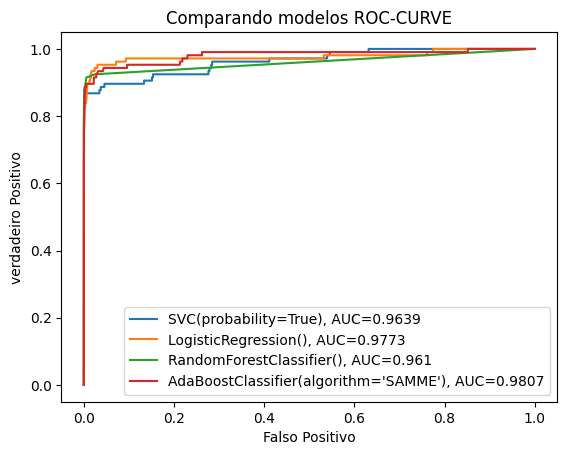

In [14]:
plot_validation_clf_models(X_train, X_test, y_train, y_test)